# AIMIA and SAS Hackathon - Marketing Analytics

**Case Questions** 

1. How was the campaign measured? What was the methodology used?
2. How did the campaign perform? 
3. Should the marketing team repeat this campaign in the future?
4. What should suzanne change (if anything), if this campaign is repeated in the future?
5. Are there any interesting insights the can inform Suzanne regarding the customer base or the business?

## Import Data 

In [1]:
#Import all data tables & libraries# 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
dateparse = lambda dates: [pd.datetime.strptime(d, '%d%b%Y') for d in dates]
Adjudications = pd.read_csv("C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\rotman_offer_adjudication.csv") 
Transactions = pd.read_csv("C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\rotman_transactions.csv",parse_dates=["TX_DT"], date_parser=dateparse)
Target_list = pd.read_csv("C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\rotman_target_list.csv")
Signup_list = pd.read_csv("C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\rotman_signup_history.csv", parse_dates=["SIGNUP_DATE",'FIRST_TX_DATE'], date_parser=dateparse)

## Explore and Clean Data 

In [2]:
Adjudications.head(10)
#Adjudications[Adjudications['reward_code'] == 'KT49']['customer_id'].nunique()  

,customer_id,adjudication_tx_id,reward_code,leaves_issued
0,1674912,1145981707,KT49,400
1,1674912,1143655853,KT49,300
2,1674912,1138661229,KT49,200
3,1674912,1138661221,KT49,100
4,3793228,1142342749,KT49,100
5,5400119,1144465632,KT51,100
6,3956584,1146088449,KT51,200
7,3956584,1143188881,KT51,100
8,10889203,1144662746,KT51,200
9,10889203,1139032399,KT51,100


In [3]:
#Explore Transactions Data Set#
#Number of records = 3,792,583 Transactions 
Transactions.shape
Transactions.info()
Transactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792583 entries, 0 to 3792582
Data columns (total 6 columns):
CUSTOMER_ID    int64
TX_DT          datetime64[ns]
TXN_ID         int64
TEA_GRADE      object
QUANTITY_GM    float64
SALES_VALUE    float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 173.6+ MB


,CUSTOMER_ID,TXN_ID,QUANTITY_GM,SALES_VALUE
count,3.792583e+06,3.792583e+06,3.792583e+06,3.792583e+06
mean,1.005797e+07,2.285646e+08,8.033487e+01,5.177825e+01
std,5.895696e+06,3.024468e+07,4.626301e+01,2.958320e+01
min,1.540000e+02,1.772106e+08,2.000000e+00,4.800000e-01
25%,4.819684e+06,2.025182e+08,5.600000e+01,3.601000e+01
50%,1.041251e+07,2.289730e+08,7.800000e+01,5.000000e+01
75%,1.528109e+07,2.518715e+08,1.000000e+02,6.464000e+01
max,2.106415e+07,2.850907e+08,1.588400e+04,9.125840e+03


In [4]:
#Explore Target List: 
#Number of unique customers:
Target_list.describe() 
Target_list.shape 
Target_list['CUSTOMER_ID'].nunique() 

111102

In [5]:
#Explore Signup_list
#PROBLEM: 119,576 Rows but there should only be 111,102 rows, as this is the total number of unique customers
Signup_list.shape
Signup_list.columns
Signup_list['CUSTOMER_ID'].nunique()
Signup_list['CUSTOMER_ID'].count()
Signup_list['CUSTOMER_ID'].duplicated().sum()
Signup_list[Signup_list['CUSTOMER_ID'].duplicated(False)].sort_values('CUSTOMER_ID', ascending = True)

,CUSTOMER_ID,SIGNUP_DATE,FIRST_TX_DATE
17618,830,1984-07-17,2012-02-15
17619,830,1996-04-23,2012-02-15
75288,3910,2005-07-14,2010-01-16
75289,3910,1984-11-30,2010-01-16
37047,5337,1984-08-24,2004-11-20
37048,5337,1997-04-02,2004-11-20
118544,6868,1984-10-30,2006-07-31
118545,6868,2000-03-31,2006-07-31
16065,7896,1984-10-29,2005-04-18
16064,7896,1984-11-13,2005-04-18


In [6]:
#Investigating descrepancy between number of unique customers in "Target_List" and "Signup_List"
#How to make a cross tab in Python: cabin_tab = pd.crosstab(index=titanic_train["Cabin"], columns="count")     
Signup_list_tab = pd.crosstab(index=Signup_list["SIGNUP_DATE"],columns="count")
print(Signup_list_tab.sort(['count'], ascending=False))

col_0        count
SIGNUP_DATE       
2001-01-01    7010
1992-08-15     384
1987-04-24     303
1984-07-17     190
1992-03-19     115
1992-10-16      98
1987-05-08      92
1989-11-24      88
1989-01-06      82
1988-12-23      80
2000-01-31      75
1990-01-05      75
1984-09-26      71
1992-10-08      71
1988-02-26      64
1992-09-17      63
1992-09-24      62
1988-01-08      62
1992-08-28      61
1984-08-31      61
2007-02-27      59
1989-06-09      59
1984-08-24      58
1998-07-23      56
1990-02-16      54
1989-06-17      53
1990-04-06      53
2007-03-01      53
2007-02-28      52
2007-02-26      52
...            ...
1991-06-02       1
1991-09-02       1
1991-09-01       1
1991-08-22       1
1991-08-08       1
1991-08-04       1
1991-07-22       1
1991-07-16       1
1991-07-07       1
1991-06-30       1
1991-06-29       1
1991-06-18       1
1991-06-06       1
1991-06-05       1
1991-05-23       1
1991-01-22       1
1991-05-14       1
1991-05-12       1
1991-05-04       1
1991-04-27  

C:\Users\New User\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [7]:
#IDENTFIED: Duplicate Customer ID's because signup date of '2001-01-01' appears to have been entered for older records 
#df.sort(['a', 'b'], ascending=[True, False])
#SOLUTION: Remove records that have signup dates before '2001-01-01' 
#By sorting Signup data by customer_id and signup date & drop duplicates
Sorted_signup = (Signup_list.sort_values(['CUSTOMER_ID','SIGNUP_DATE'], ascending=[True, True]))
Signup_nodup = Sorted_signup.drop_duplicates(["CUSTOMER_ID"],keep='last')
Signup_nodup.shape
pd.crosstab(index=Signup_nodup["SIGNUP_DATE"],columns="count")

col_0,count
SIGNUP_DATE,
1984-07-17,177
1984-08-07,1
1984-08-16,6
1984-08-21,3
1984-08-24,51
1984-08-31,58
1984-09-12,27
1984-09-18,18
1984-09-26,60


In [8]:
#create Profit_Margin dataframe

d = {'MARGIN_PER_GM' : [0.15, 0.18, 0.20, 0.30],
     'MATCHA_TEA_GRADE' : ['CLASSIC','INGREDIENT','PREMIUM','CEREMONIAL']
      }

Profit_Margins = pd.DataFrame(d)
Profit_Margins = Profit_Margins[['MATCHA_TEA_GRADE','MARGIN_PER_GM']]
Profit_Margins


,MATCHA_TEA_GRADE,MARGIN_PER_GM
0,CLASSIC,0.15
1,INGREDIENT,0.18
2,PREMIUM,0.20
3,CEREMONIAL,0.30


## Transform Data (Merge Data + Add Columns) 

In [9]:
#Merge Transaction, Target, and Signup Data to create transaction-level dataset 
Trans_Target = pd.merge(Transactions,Target_list, left_on="CUSTOMER_ID", right_on="CUSTOMER_ID")
Trans_Target_Signup = pd.merge(Trans_Target, Signup_nodup, left_on="CUSTOMER_ID", right_on="CUSTOMER_ID")
Trans_Target_Signup = pd.merge(Trans_Target_Signup,Profit_Margins, 
                                                left_on='TEA_GRADE', right_on='MATCHA_TEA_GRADE')

Trans_Target_Signup.head(10)


,CUSTOMER_ID,TX_DT,TXN_ID,TEA_GRADE,QUANTITY_GM,SALES_VALUE,REWARD_CODE,CONTACT_STATUS,SIGNUP_DATE,FIRST_TX_DATE,MATCHA_TEA_GRADE,MARGIN_PER_GM
0,12116720,2013-02-10,213446126,CLASSIC,46.0,30.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
1,12116720,2013-02-08,213232000,CLASSIC,38.0,25.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
2,12116720,2012-02-26,182278703,CLASSIC,66.0,43.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
3,12116720,2012-04-23,189925481,CLASSIC,62.0,40.01,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
4,12116720,2012-04-27,190268136,CLASSIC,52.0,33.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
5,12116720,2012-08-13,199067639,CLASSIC,62.0,40.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
6,12116720,2013-11-29,244547353,CLASSIC,32.0,20.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
7,12116720,2013-03-31,217705148,CLASSIC,32.0,20.05,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
8,12116720,2012-02-16,180812930,CLASSIC,58.0,36.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15
9,12116720,2012-02-12,180260575,CLASSIC,72.0,45.00,KT49,CNTC,2006-08-07,2010-06-30,CLASSIC,0.15


In [80]:
#Adding calculated columms
#Code for between two dates: (df['date'] > start_date) & (df['date'] <= end_date)
Trans_Target_Signup["CUSTOMER_TENURE"] = pd.datetime.now().date() - Trans_Target_Signup['SIGNUP_DATE']
Trans_Target_Signup["NUM_TRANSACTIONS"] = 1
Trans_Target_Signup["SEGMENTS"] = Trans_Target_Signup['REWARD_CODE'].map({'KT49': "Segment 1" , 'KT51': "Segment 2"})
Trans_Target_Signup["IN_CAMPAIGN"] = ((Trans_Target_Signup['TX_DT'] >= pd.datetime(2014,11,4)) & (Trans_Target_Signup['TX_DT'] <=  pd.datetime(2014,12,5))).astype('int') 
Trans_Target_Signup["PROFIT"] = Trans_Target_Signup["MARGIN_PER_GM"] * Trans_Target_Signup["QUANTITY_GM"]
Trans_Target_Signup.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792583 entries, 0 to 3792582
Data columns (total 24 columns):
CUSTOMER_ID         int64
TX_DT               datetime64[ns]
TXN_ID              int64
TEA_GRADE           object
QUANTITY_GM         float64
SALES_VALUE         float64
REWARD_CODE         object
CONTACT_STATUS      object
SIGNUP_DATE         datetime64[ns]
FIRST_TX_DATE       datetime64[ns]
MATCHA_TEA_GRADE    object
MARGIN_PER_GM       float64
CUSTOMER_TENURE     timedelta64[ns]
NUM_TRANSACTIONS    int64
SEGMENTS            object
IN_CAMPAIGN         int32
PROFIT              float64
CEREMONIAL          float64
CLASSIC             float64
INGREDIENT          float64
PREMIUM             float64
TX_YEAR             int64
TX_MONTH            int64
TX_MONTH_YEAR       datetime64[ns]
dtypes: datetime64[ns](4), float64(8), int32(1), int64(5), object(5), timedelta64[ns](1)
memory usage: 708.9+ MB


0         3959 days
1         3959 days
2         3959 days
3         3959 days
4         3959 days
5         3959 days
6         3959 days
7         3959 days
8         3959 days
9         3959 days
10        3959 days
11        3959 days
12        3959 days
13        3959 days
14        3959 days
15        3959 days
16        3959 days
17        3959 days
18        3959 days
19        3959 days
20        3959 days
21        3959 days
22        3959 days
23        3959 days
24        3959 days
25        3959 days
26        3959 days
27        3959 days
28        3959 days
29        3959 days
             ...   
3792553   9681 days
3792554   1295 days
3792555   8058 days
3792556   8058 days
3792557   8058 days
3792558   8058 days
3792559   8058 days
3792560   1421 days
3792561   1421 days
3792562   1421 days
3792563   1421 days
3792564   1421 days
3792565   1421 days
3792566   1421 days
3792567   1421 days
3792568   1421 days
3792569   1421 days
3792570   1421 days
3792571   1421 days


In [11]:
#Perform aggregations 
aggregations = {
    'NUM_TRANSACTIONS': { 
        'TOTAL_TRANSACTIONS': 'count',
},      
    'SALES_VALUE': {
        'TOTAL_SALES': 'sum',
        'MEAN_SALES': 'mean'
        
},  'QUANTITY_GM':{ #Work on the quantity column
        'TOTAL_QUANTITY':'sum', #get the sum and call it Total_quantity
        'MEAN_BASKET_SIZE': 'mean' #mean basket size       
}}


In [12]:
#Create customer-level analytical table 

customer_table = Trans_Target_Signup.groupby \
                (['CUSTOMER_ID','SEGMENTS','CONTACT_STATUS','IN_CAMPAIGN'], as_index=False).agg(aggregations)    

customer_table.columns  = customer_table.columns.droplevel(0)

customer_table.rename(columns ={0: 'CUSTOMER_ID',1: 'SEGMENTS',2: 'CONTACT_STATUS',3:'IN_CAMPAIGN'}, inplace=True)
customer_table.head(10)
new_col = ['CUSTOMER_ID','SEGMENTS','CONTACT_STATUS','IN_CAMPAIGN','TOTAL_TRANSACTIONS',\
          'BASKET_VALUE','TOTAL_SALES','TOTAL_QUANTITY','BASKET_SIZE']
customer_table.columns = new_col
customer_table.head(10)

,CUSTOMER_ID,SEGMENTS,CONTACT_STATUS,IN_CAMPAIGN,TOTAL_TRANSACTIONS,BASKET_VALUE,TOTAL_SALES,TOTAL_QUANTITY,BASKET_SIZE
0,154,Segment 1,CNTC,0,11,20.486364,225.35,30.363636,334.0
1,283,Segment 2,CNTC,0,28,58.039286,1625.10,78.642857,2202.0
2,354,Segment 2,CNTC,0,53,78.412075,4155.84,117.169811,6210.0
3,354,Segment 2,CNTC,1,1,72.010000,72.01,128.000000,128.0
4,430,Segment 1,CNTC,0,31,21.729677,673.62,35.225806,1092.0
5,430,Segment 1,CNTC,1,1,20.010000,20.01,34.000000,34.0
6,524,Segment 2,CNTC,0,31,60.350968,1870.88,87.741935,2720.0
7,524,Segment 2,CNTC,1,1,60.000000,60.00,94.000000,94.0
8,623,Segment 2,CNTC,0,33,54.158485,1787.23,85.636364,2826.0
9,623,Segment 2,CNTC,1,1,48.250000,48.25,86.000000,86.0


## Analysis 

### Question 1: How was the campaign measured? What was the methodology used?

- Since Suzan was interested in frequency, an appropriate metric would be Purchase Frequency
- Purchase Frequency = (# of transaction)/(# unique Customers) 
    - Methodology: 
        - Calculate the average number of transactions for the control and experimental groups for both Segments
        - Perform difference of means hypothesis t-test to determine whether lift is significant 
        

In [13]:
# Function to get the desired metric 
def get_metric(segment,status,metric): 
    pf = customer_table[(customer_table['SEGMENTS'] == segment )\
         & (customer_table['IN_CAMPAIGN'] == 1 ) \
         & (customer_table['CONTACT_STATUS'] == status)][metric]
    return pf

# Lift function expressed as a percentage 
def lift_percentage(exp,ctrl):
    percent_change = ((exp - ctrl)/ ctrl)*100
    return percent_change

# T-test function 
def get_ttest(exp,ctrl):
    ttest = ttest_ind(exp,ctrl)
    return ttest 



In [14]:
#Calculate purchase frequency 
pf_seg_1_exp = get_metric('Segment 1','CNTC','TOTAL_TRANSACTIONS')
pf_seg_1_ctrl = get_metric('Segment 1','CTRL','TOTAL_TRANSACTIONS')   
pf_seg_2_exp = get_metric('Segment 2','CNTC','TOTAL_TRANSACTIONS')
pf_seg_2_ctrl = get_metric('Segment 2','CTRL','TOTAL_TRANSACTIONS')

print('Segment 1 Exp Purchase Frequency: {0:.2f} transactions per customer'.format(pf_seg_1_exp.mean()))
print('Segment 1 Ctrl Purchase Frequency: {0:.2f} transactions per customer'.format(pf_seg_1_ctrl.mean()))
print('Segment 2 Exp Purchase Frequency: {0:.2f} transactions per customer'.format(pf_seg_2_exp.mean()))
print('Segment 2 Ctrl Purchase Frequency: {0:.2f} transactions per customer'.format(pf_seg_2_ctrl.mean()))

Segment 1 Exp Purchase Frequency: 1.57 transactions per customer
Segment 1 Ctrl Purchase Frequency: 1.50 transactions per customer
Segment 2 Exp Purchase Frequency: 2.04 transactions per customer
Segment 2 Ctrl Purchase Frequency: 1.93 transactions per customer


In [15]:
#Calculate lift 
pf_seg_1_lift  = lift_percentage(pf_seg_1_exp.mean(),pf_seg_1_ctrl.mean())
pf_seg_2_lift  = lift_percentage(pf_seg_2_exp.mean(),pf_seg_2_ctrl.mean())

print('Segment 1 Purchase Frequency lift: {0:.2f}%'.format(pf_seg_1_lift))
print('Segment 2 Purchase Frequency lift: {0:.2f}%'.format(pf_seg_2_lift))

Segment 1 Purchase Frequency lift: 5.25%
Segment 2 Purchase Frequency lift: 5.73%


In [16]:
#Calculate ttest: to determine whether the difference in mean Purchase Frequency 
#between control and experimental groups is statistically signigicant
pf_seg_1_ttest = get_ttest(pf_seg_1_exp,pf_seg_1_ctrl)
pf_seg_2_ttest = get_ttest(pf_seg_2_exp,pf_seg_2_ctrl)

print("Segment 1 T-test:  {}".format(pf_seg_1_ttest))
print("Segment 2 T-test:  {}".format(pf_seg_2_ttest))
print('Both are statistically significant')

Segment 1 T-test:  Ttest_indResult(statistic=2.4585100095264414, pvalue=0.013958877797061821)
Segment 2 T-test:  Ttest_indResult(statistic=3.3136426280561948, pvalue=0.00092199840433249082)
Both are statistically significant


## Question 2: How did the campaign perform? 

- Outside of Purchase Frequency, other performance metrics of interest include: 
    - Incremental Sales lift (Basket Value = Sales / Unique Customers)
    - Incremental Quantity Sold lift (Basket Size = Quantity Sold / Unique Customers)
    - Response Rate = (# of unique customers who received leaves / total number of unique customers targeted)
    - ROI = (Profit - Marketing Ivestment)/Marketing Investment
        - where Marketing Investment = 0.0925 * # of Adjucated Uji Leaves
    

In [17]:
#Calculate Basket Value 
bv_seg_1_exp = get_metric('Segment 1','CNTC','BASKET_VALUE')
bv_seg_1_ctrl = get_metric('Segment 1','CTRL','BASKET_VALUE')   
bv_seg_2_exp = get_metric('Segment 1','CNTC','BASKET_VALUE')
bv_seg_2_ctrl = get_metric('Segment 2','CTRL','BASKET_VALUE')

print('Segment 1 Exp Basket Value: {0:.2f}$'.format(bv_seg_1_exp.mean()))
print('Segment 1 Ctrl Basket Value: {0:.2f}$'.format(bv_seg_1_ctrl.mean()))
print('Segment 2 Exp Basket Value: {0:.2f}$'.format(bv_seg_2_exp.mean()))
print('Segment 2 Ctrl Basket Value: {0:.2f}$'.format(bv_seg_2_ctrl.mean()))


Segment 1 Exp Basket Value: 46.28$
Segment 1 Ctrl Basket Value: 46.57$
Segment 2 Exp Basket Value: 46.28$
Segment 2 Ctrl Basket Value: 53.05$


In [18]:
#Calculate lift 
bv_seg_1_lift  = lift_percentage(bv_seg_1_exp.mean(),bv_seg_1_ctrl.mean())
bv_seg_2_lift  = lift_percentage(bv_seg_2_exp.mean(),bv_seg_2_ctrl.mean())

print('Segment 1 Basket Value lift: {0:.2f}%'.format(bv_seg_1_lift))
print('Segment 2 Basket Value lift: {0:.2f}%'.format(bv_seg_2_lift))

Segment 1 Basket Value lift: -0.63%
Segment 2 Basket Value lift: -12.76%


In [19]:
#Calculate ttest 
bv_seg_1_ttest = get_ttest(bv_seg_1_exp,bv_seg_1_ctrl)
bv_seg_2_ttest = get_ttest(bv_seg_2_exp,bv_seg_2_ctrl)

print("Segment 1 T-test:  {}".format(bv_seg_1_ttest))
print("Segment 2 T-test:  {}".format(bv_seg_2_ttest))
print('Both are not statistically signifcant')

Segment 1 T-test:  Ttest_indResult(statistic=-0.46496501803164697, pvalue=0.64196095459479496)
Segment 2 T-test:  Ttest_indResult(statistic=-11.936011294994616, pvalue=9.5896732193812542e-33)
Both are not statistically signifcant


In [20]:
#Response Rate
Customers_in_campaign = (Trans_Target_Signup[Trans_Target_Signup['CONTACT_STATUS']=='CNTC']["CUSTOMER_ID"].nunique())
Customers_Adjudications = (Adjudications['customer_id'].nunique())

Customers_Adjudications / Customers_in_campaign 

0.12918388233956257

**INSIGHT**: only 13% of people who were targetting as part of the campaign participated.

Does this differ across segments? 

In [21]:
Customers_in_campaign_seg1 = Trans_Target_Signup[(Trans_Target_Signup['CONTACT_STATUS']=='CNTC')& 
                    (Trans_Target_Signup['SEGMENTS']=='Segment 1')]["CUSTOMER_ID"].nunique()
Customers_Adjudications_seg1 = Adjudications[Adjudications['reward_code'] == 'KT49']['customer_id'].nunique()
Seg1_response_rate = Customers_Adjudications_seg1 / Customers_in_campaign_seg1

print("Segment 1: {0:.3f}".format(Seg1_response_rate))
                                                 

Segment 1: 0.099


In [22]:
Customers_in_campaign_seg2 = Trans_Target_Signup[(Trans_Target_Signup['CONTACT_STATUS']=='CNTC')& 
                    (Trans_Target_Signup['SEGMENTS']=='Segment 2')]["CUSTOMER_ID"].nunique()
Customers_Adjudications_seg2 = Adjudications[Adjudications['reward_code'] == 'KT51']['customer_id'].nunique()

Seg2_response_rate = Customers_Adjudications_seg2 / Customers_in_campaign_seg2

print("Segment 2: {0:.3f}".format(Seg2_response_rate))

Segment 2: 0.174


Segment 1 had only ~ 10% response rate while Segment 2 performed much better at 17%

Of those who responded in the campaign, how engaged were they? (Measured by the average number of leaves adjudicated per campaign participant) 

In [23]:
engagement = Adjudications.groupby(['reward_code','customer_id']).agg({'leaves_issued':'sum'})
engagement = engagement.groupby(level=0).apply(lambda x: x.mean())
engagement

,leaves_issued
reward_code,
KT49,255.682919
KT51,265.985480


On average, 
- Segment 2 were adjucated 265 leaves translating to 4 to 5 transactions during the campaign
- Segment 1 were adjucated 255 leaves translating to 3 to 4 transactions during the campaign


In [24]:
#ROI = (Profit - Marketing Ivestment)/Marketing Investment   
#where Marketing Investment = 0.0925 * # of Adjucated Uji Leaves 

profits =  Trans_Target_Signup[(Trans_Target_Signup['CONTACT_STATUS']=='CNTC') & 
                               (Trans_Target_Signup['IN_CAMPAIGN']==1)]['PROFIT'].sum()
adjucated_leaves = Adjudications['leaves_issued'].sum()
cost_per_leaf = 0.0925
marketing_investment = cost_per_leaf * adjucated_leaves
ROI = (profits - marketing_investment)/marketing_investment

ROI

2.7298257556846375

## Question 3: Should the marketing team repeat this campaign?

Yes,for two major reasons: 
1. The goal was to increase frequency, and the campaign accomplished that across both segments. 
2. There was a positive ROI. For every dollar spent on the marketing campaign returned of 2.7 dollars in profit


## What should Suzanne change (if anything), if this campaign is repeated in the future?
   1. Questions to look into:
        1. Are there certain items that performed better than others?
            1. Did this change during the campaign? (i.e. did in force consumers to concentrate on lower margin products) 
        2. Is is worthwhile to concentrate on one set of segments?
        3. Did the campaign work best for consumers who most recently bought from us? Should we target them first?
        4. Is it possible to identify the most profitable customers through clustering (or K-nearest neighbor?) 

### Are there certain items that performed better than others?

In [25]:
# Tea grades count by segment - absolute 
tea_grade = Trans_Target_Signup[Trans_Target_Signup['IN_CAMPAIGN']==1]\
            .groupby(['SEGMENTS','TEA_GRADE']).agg({'TEA_GRADE': 'count'})
tea_grade_plot= tea_grade.plot(kind='bar')

In [26]:
# Tea grades count by segment - percentage 
pct_tea_grade = tea_grade.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).plot(kind='bar')


In [27]:
#Tea grades profit by segment - absolute 

tea_grade_profit = Trans_Target_Signup[Trans_Target_Signup['IN_CAMPAIGN']==1]\
            .groupby(['SEGMENTS','TEA_GRADE']).agg({'PROFIT': 'sum'})
#tea_grade_profit   
tea_grade_prof_plot = tea_grade_profit.plot(kind='bar')

In [28]:
#Tea grades profit by segment - percentage
pct_tea_grade_profit = tea_grade_profit.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).plot(kind='bar')

CLASSIC dominates in terms of volume sold as well as share of its profits. Across both segments CLASSIC makes up ~ 80% of sales and profits. 

**Was this the case outside of the campaign as well?**

In [29]:
 
tea_grade_not_campaign = Trans_Target_Signup[Trans_Target_Signup['IN_CAMPAIGN']==0]\
            .groupby(['SEGMENTS','TEA_GRADE']).agg({'PROFIT': 'sum'})
tea_grade_not_campaign_plot = tea_grade_not_campaign.groupby(level=0).apply(lambda x: 100* x / float(x.sum())).plot(kind='bar')

No, proportion of profit is the same outside of the campaign 

**Was this always the case? Did product mix change over time?** 

In [30]:
#get product dummies 
tea_dummies = pd.get_dummies(Trans_Target_Signup.TEA_GRADE)

In [31]:
Trans_Target_Signup = pd.concat([Trans_Target_Signup, tea_dummies], axis=1)
Trans_Target_Signup.head(100)

,CUSTOMER_ID,TX_DT,TXN_ID,TEA_GRADE,QUANTITY_GM,SALES_VALUE,REWARD_CODE,CONTACT_STATUS,SIGNUP_DATE,FIRST_TX_DATE,...,MARGIN_PER_GM,CUSTOMER_TENURE,NUM_TRANSACTIONS,SEGMENTS,IN_CAMPAIGN,PROFIT,CEREMONIAL,CLASSIC,INGREDIENT,PREMIUM
0,12116720,2013-02-10,213446126,CLASSIC,46.0,30.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,6.9,0.0,1.0,0.0,0.0
1,12116720,2013-02-08,213232000,CLASSIC,38.0,25.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,5.7,0.0,1.0,0.0,0.0
2,12116720,2012-02-26,182278703,CLASSIC,66.0,43.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,9.9,0.0,1.0,0.0,0.0
3,12116720,2012-04-23,189925481,CLASSIC,62.0,40.01,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,9.3,0.0,1.0,0.0,0.0
4,12116720,2012-04-27,190268136,CLASSIC,52.0,33.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,7.8,0.0,1.0,0.0,0.0
5,12116720,2012-08-13,199067639,CLASSIC,62.0,40.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,9.3,0.0,1.0,0.0,0.0
6,12116720,2013-11-29,244547353,CLASSIC,32.0,20.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,4.8,0.0,1.0,0.0,0.0
7,12116720,2013-03-31,217705148,CLASSIC,32.0,20.05,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,4.8,0.0,1.0,0.0,0.0
8,12116720,2012-02-16,180812930,CLASSIC,58.0,36.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,8.7,0.0,1.0,0.0,0.0
9,12116720,2012-02-12,180260575,CLASSIC,72.0,45.00,KT49,CNTC,2006-08-07,2010-06-30,...,0.15,3959 days,1,Segment 1,0,10.8,0.0,1.0,0.0,0.0


In [32]:
#Parsing date column to create new YEAR, MONTH, and MONTH-YEAR columns
Trans_Target_Signup['TX_YEAR'] = Trans_Target_Signup['TX_DT'].dt.year
Trans_Target_Signup['TX_MONTH'] = Trans_Target_Signup['TX_DT'].dt.month 
Trans_Target_Signup['TX_MONTH_YEAR'] = Trans_Target_Signup['TX_YEAR'].map(str) + "-" + Trans_Target_Signup['TX_MONTH'].map(str)
Trans_Target_Signup['TX_MONTH_YEAR'] = pd.to_datetime(Trans_Target_Signup['TX_MONTH_YEAR'], format= '%Y-%m')


In [33]:
tea_date = Trans_Target_Signup[['TX_MONTH_YEAR','CEREMONIAL','CLASSIC','INGREDIENT','PREMIUM']]
tea_date = tea_date.groupby(['TX_MONTH_YEAR']).agg({'CEREMONIAL':'sum','CLASSIC':'sum','INGREDIENT':'sum','PREMIUM':'sum'})
tea_date.head(100)

,INGREDIENT,CLASSIC,PREMIUM,CEREMONIAL
TX_MONTH_YEAR,,,,
2012-01-01,4001.0,83444.0,9756.0,0.0
2012-02-01,4090.0,84681.0,9885.0,0.0
2012-03-01,4411.0,93816.0,10903.0,0.0
2012-04-01,4384.0,90865.0,10822.0,0.0
2012-05-01,4982.0,102453.0,13538.0,0.0
2012-06-01,4604.0,93929.0,12361.0,0.0
2012-07-01,4501.0,92940.0,12259.0,0.0
2012-08-01,4852.0,97009.0,12632.0,0.0
2012-09-01,4570.0,91379.0,11850.0,0.0


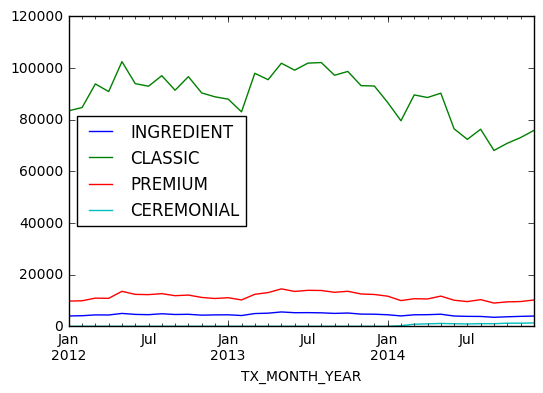

In [34]:
%matplotlib inline 
tea_date.plot(kind='line')

- CLASSIC has alway been dominant with consistent dips in January. There appears to be recent decline beginning February 2014. 
- CEREMONIAL has traditionally been the worse seller. However, there appears to be a slight increase over the last year.



**Let's take a closer look at what happenened over the last year**

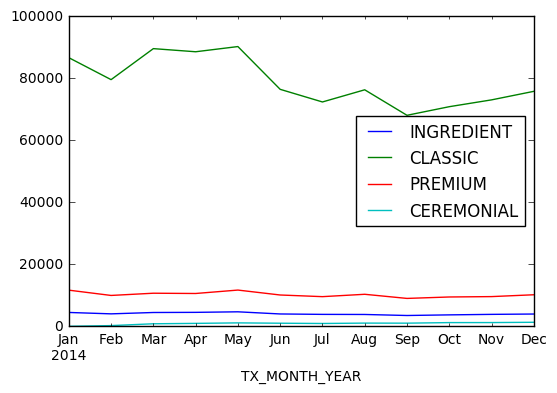

In [35]:
#df.loc[df.index < '2013-10-16 08:00:00']
tea_grade_2014 = tea_date.loc[tea_date.index >= '2014-01-01']
tea_grade_2014.plot(kind='line')
#tea_date[tea_date["TX_MONTH_YEAR"] > pd.datetime(2014,1,1)]

Beginning May 2014, Premium sales have declined. 

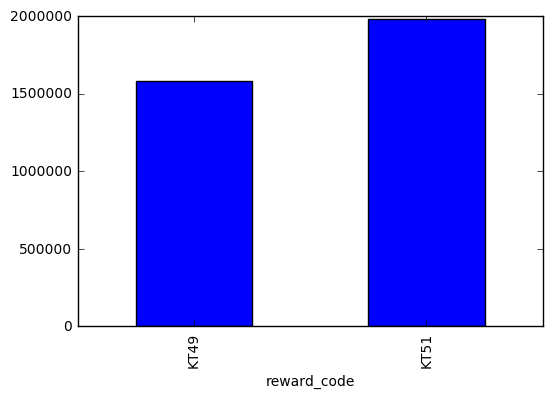

In [36]:
%matplotlib inline 
Adjudications.groupby(['reward_code']).agg({'leaves_issued': {'total_leaves': \
                                          'sum','adjudication_count': 'count'}})\
                                            ['leaves_issued','total_leaves'].plot(kind='bar')

More leaves issued to Segment 2. This makes sense as they were identified as more frequent purchasers. 

Are we segmenting correctly? Let's try cluster analysis to determine similar customers? (clustering)

### Apply RFM Analaysis

In [38]:
Trans_Target_Signup.head(10)

,CUSTOMER_ID,TX_DT,TXN_ID,TEA_GRADE,QUANTITY_GM,SALES_VALUE,REWARD_CODE,CONTACT_STATUS,SIGNUP_DATE,FIRST_TX_DATE,...,SEGMENTS,IN_CAMPAIGN,PROFIT,CEREMONIAL,CLASSIC,INGREDIENT,PREMIUM,TX_YEAR,TX_MONTH,TX_MONTH_YEAR
0,12116720,2013-02-10,213446126,CLASSIC,46.0,30.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,6.9,0.0,1.0,0.0,0.0,2013,2,2013-02-01
1,12116720,2013-02-08,213232000,CLASSIC,38.0,25.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,5.7,0.0,1.0,0.0,0.0,2013,2,2013-02-01
2,12116720,2012-02-26,182278703,CLASSIC,66.0,43.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,9.9,0.0,1.0,0.0,0.0,2012,2,2012-02-01
3,12116720,2012-04-23,189925481,CLASSIC,62.0,40.01,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,9.3,0.0,1.0,0.0,0.0,2012,4,2012-04-01
4,12116720,2012-04-27,190268136,CLASSIC,52.0,33.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,7.8,0.0,1.0,0.0,0.0,2012,4,2012-04-01
5,12116720,2012-08-13,199067639,CLASSIC,62.0,40.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,9.3,0.0,1.0,0.0,0.0,2012,8,2012-08-01
6,12116720,2013-11-29,244547353,CLASSIC,32.0,20.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,4.8,0.0,1.0,0.0,0.0,2013,11,2013-11-01
7,12116720,2013-03-31,217705148,CLASSIC,32.0,20.05,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,4.8,0.0,1.0,0.0,0.0,2013,3,2013-03-01
8,12116720,2012-02-16,180812930,CLASSIC,58.0,36.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,8.7,0.0,1.0,0.0,0.0,2012,2,2012-02-01
9,12116720,2012-02-12,180260575,CLASSIC,72.0,45.00,KT49,CNTC,2006-08-07,2010-06-30,...,Segment 1,0,10.8,0.0,1.0,0.0,0.0,2012,2,2012-02-01


In [48]:
Trans_Target_Signup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792583 entries, 0 to 3792582
Data columns (total 24 columns):
CUSTOMER_ID         int64
TX_DT               datetime64[ns]
TXN_ID              int64
TEA_GRADE           object
QUANTITY_GM         float64
SALES_VALUE         float64
REWARD_CODE         object
CONTACT_STATUS      object
SIGNUP_DATE         datetime64[ns]
FIRST_TX_DATE       datetime64[ns]
MATCHA_TEA_GRADE    object
MARGIN_PER_GM       float64
CUSTOMER_TENURE     timedelta64[ns]
NUM_TRANSACTIONS    int64
SEGMENTS            object
IN_CAMPAIGN         int32
PROFIT              float64
CEREMONIAL          float64
CLASSIC             float64
INGREDIENT          float64
PREMIUM             float64
TX_YEAR             int64
TX_MONTH            int64
TX_MONTH_YEAR       datetime64[ns]
dtypes: datetime64[ns](4), float64(8), int32(1), int64(5), object(5), timedelta64[ns](1)
memory usage: 708.9+ MB


In [149]:
NOW = pd.datetime.now()
Now_as_per_case = pd.datetime(2015,1,1)



In [150]:
rfm_table = Trans_Target_Signup.groupby \
                (['CUSTOMER_ID']).agg({"TX_DT": lambda x: Now_as_per_case - x.max(), #Recency
                                        "TXN_ID": lambda x:len(x), # Frequency 
                                        "SALES_VALUE": lambda x: x.sum()}) # Monetary Value 



In [151]:
rfm_table['TX_DT'] = rfm_table['TX_DT'].dt.days
    
rfm_table.rename(columns={'TX_DT': 'recency', 
                              'TXN_ID': 'frequency', 
                              'SALES_VALUE': 'monetary_value'}, inplace=True)
rfm_table.head(10)

,frequency,recency,monetary_value
CUSTOMER_ID,,,
154,11,107,225.35
283,28,111,1625.10
354,54,47,4227.85
430,32,13,693.63
524,32,26,1930.88
623,34,17,1835.48
695,8,99,435.17
700,25,8,1137.86
726,56,22,3058.24


In [152]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])

quantiles = quantiles.to_dict()

quantiles


{'frequency': {0.25: 14.0, 0.5: 27.0, 0.75: 47.0},
 'monetary_value': {0.25: 673.69000000000005,
  0.5: 1353.0899999999997,
  0.75: 2442.5100000000007},
 'recency': {0.25: 13.0, 0.5: 37.0, 0.75: 103.0}}

In [153]:
# We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good. 
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def SegNames(x):
    if x == '111':
        return 'Best Customers'
    elif x[1] == '1':
        return 'Loyal Customers'
    elif x[2] == '1':
        return 'Big Spenders'
    elif x == '311':
        return 'Almost Lost'
    elif x == '411':
        return 'Lost Customers'
    elif x == '444':
        return 'Lost Cheap Customers'
    else: 
        return 'No Category'

In [154]:

rfm_segmentation = rfm_table

rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))
rfm_segmentation['RFMClass'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)

In [156]:
rfm_segmentation['rfm_segment'] =  rfm_segmentation['RFMClass'].apply(SegNames)
rfm_segmentation[rfm_segmentation["rfm_segment"] == "Big Spenders"]

,frequency,recency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,rfm_segment
CUSTOMER_ID,,,,,,,,
3874,29,69,2723.50,3,2,1,321,Big Spenders
4794,42,16,2787.18,2,2,1,221,Big Spenders
4912,41,1,2641.49,1,2,1,121,Big Spenders
6720,42,12,2919.22,1,2,1,121,Big Spenders
7288,38,2,2604.71,1,2,1,121,Big Spenders
9528,31,91,2667.28,3,2,1,321,Big Spenders
12239,44,23,3580.21,2,2,1,221,Big Spenders
14273,45,17,2861.57,2,2,1,221,Big Spenders
15546,27,40,2669.10,3,3,1,331,Big Spenders


### Extract Files to CSV for Tableau Visualizations 

In [157]:
rfm_segmentation.to_csv('C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\rfm_segmentaion_revised.csv', sep=',')

In [146]:
Trans_Target_Signup.to_csv('C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\Trans_Target_Signup.csv', sep=",")

In [147]:
customer_table.to_csv('C:\\Users\\New User\\Google Drive\\Working in Progress\\AIMIA SAS Hackathon\\AimiaFiles\\customer_table.csv', sep=",")